In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data_houses = pd.read_csv("C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Houses\\data\\train.csv")

In [74]:
data_houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [75]:
data_houses.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [76]:
missing_percentage = (data_houses.isnull().sum() / len(data_houses)) * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
data_houses.drop(columns=columns_to_drop, inplace=True)

In [77]:
data_houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

class StringEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
    
        self.numerical_columns = X.select_dtypes(include=['int64', 'object', 'float64']).columns.tolist()

        self.encoders = {}
        for column in self.string_columns:
            encoder = OneHotEncoder()
            encoder.fit(X[[column]])
            self.encoders[column] = encoder
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        for column, encoder in self.encoders.items():

            vector = encoder.transform(X[[column]]).toarray()

            tags_columns = encoder.get_feature_names_out([column])
 
            for i in range(len(vector.T)):
                X_encoded[tags_columns[i]] = vector.T[i]

        X_encoded.drop(columns=self.string_columns, inplace=True)
        return X_encoded


In [79]:


class ColumnImputing(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X = imputer.fit_transform(X)
        return X

In [80]:
class Dropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis=1, errors="ignore")
    
# column_names = data_houses.columns.tolist()
# print(column_names)

In [81]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("columnimputer", ColumnImputing()),
("stringencoder", StringEncoder()),
("dropper", Dropper())])

In [82]:
# from sklearn.model_selection import StratifiedShuffleSplit

# data_houses['StratificationGroup'] = (data_houses['SalePrice'].astype(str) +
#                                            data_houses['OverallQual'].astype(str) +
#                                            data_houses['OverallCond'].astype(str))

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

# for train_head, test_head in split.split(data_houses, data_houses['StratificationGroup']):
#     solid_train_way = data_houses.loc[train_head]
#     solid_test_way = data_houses.loc[test_head]

# data_houses = data_houses.drop(columns=['StratificationGroup'])




# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# for train_head, test_head in split.split(data_houses, data_houses[["SalePrice", "MSZoning", "LotArea"]]):
#     solid_train_way = data_houses.loc[train_head]
#     solid_test_way =  data_houses.loc[test_head]






# import pandas as pd
# from sklearn.model_selection import StratifiedShuffleSplit

# data_houses['SalePriceCategory'] = pd.qcut(data_houses['SalePrice'], q=5, labels=False, duplicates='drop')
# data_houses['OverallQualCategory'] = pd.qcut(data_houses['OverallQual'], q=5, labels=False, duplicates='drop')
# data_houses['OverallCondCategory'] = pd.qcut(data_houses['OverallCond'], q=5, labels=False, duplicates='drop')

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

# data_houses['StratificationGroup'] = (
#     data_houses['SalePriceCategory'].astype(str) +
#     data_houses['OverallQualCategory'].astype(str) +
#     data_houses['OverallCondCategory'].astype(str)
# )

# for train_head, test_head in split.split(data_houses, data_houses['StratificationGroup']):
#     solid_train_way = data_houses.loc[train_head]
#     solid_test_way = data_houses.loc[test_head]

# data_houses = data_houses.drop(columns=['SalePriceCategory', 'OverallQualCategory', 'OverallCondCategory', 'StratificationGroup'])



<Axes: >

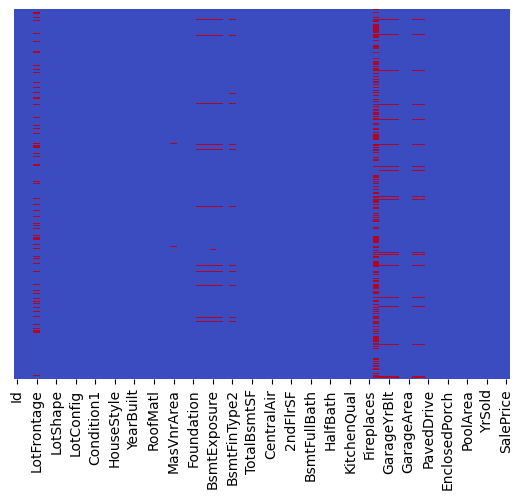

In [83]:
sns.heatmap(data_houses.isnull(),yticklabels=False,cbar=False, cmap='coolwarm')

In [84]:
mode_value0 = data_houses['LotFrontage'].mode()[0]
data_houses['LotFrontage'].fillna(mode_value0, inplace=True)

mode_value1 = data_houses['FireplaceQu'].mode()[0]
data_houses['FireplaceQu'].fillna(mode_value1, inplace=True)

mode_value2 = data_houses['GarageYrBlt'].mode()[0]
data_houses['GarageYrBlt'].fillna(mode_value2, inplace=True)


C:\Users\danie\AppData\Local\Temp\ipykernel_8564\2908085773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_houses['LotFrontage'].fillna(mode_value0, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_8564\2908085773.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

<Axes: >

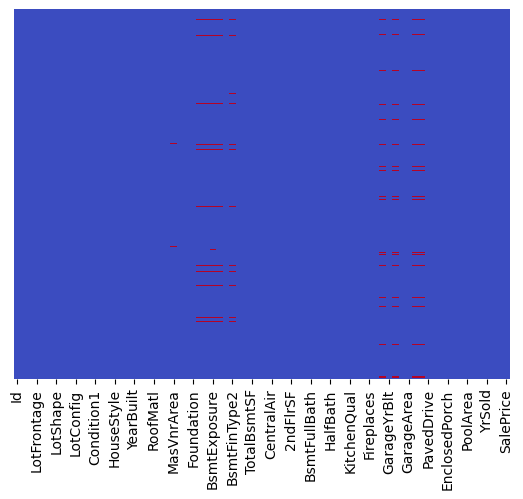

In [85]:
sns.heatmap(data_houses.isnull(),yticklabels=False,cbar=False, cmap='coolwarm')

In [89]:
object_columns = data_houses.select_dtypes(include=['object'])

In [91]:
def concatenate_columns(row):
    return ' '.join(object_columns, row)

data_houses[object_columns] = data_houses[object_columns].apply(concatenate_columns, axis=1)

ValueError: Boolean array expected for the condition, not object